In [1]:
import matplotlib
from matplotlib import transforms, pyplot as plt
import numpy as np

%matplotlib inline
#%matplotlib

C:\Python\python-3.6.2\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


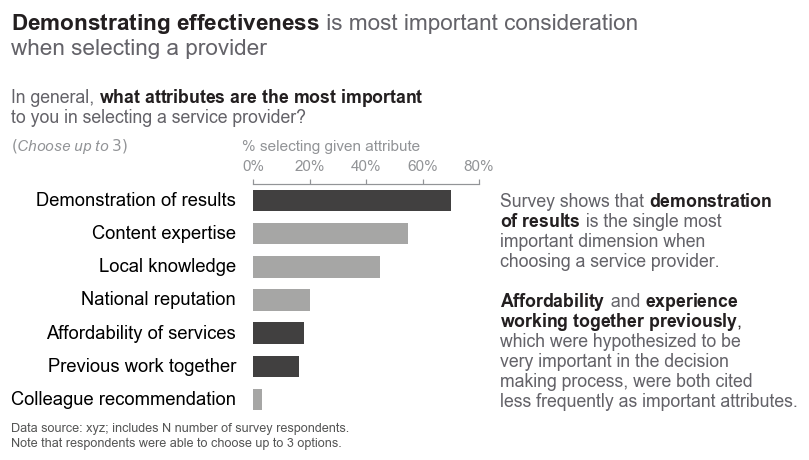

In [2]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

# survey responses
X = ['Colleague recommendation', 'Previous work together', 'Affordability of services',
     'National reputation', 'Local knowledge', 'Content expertise', 'Demonstration of results']
Y = [3, 16, 18, 20, 45, 55, 70] # responses distribution

# Battleship Grey (footnote)
color_gray1 = '#555655'
# Bobmay (0, 3, 4, 5 responses)
color_gray2 = '#A6A6A5'
# Charcoal (1, 2, 6 responses)
color_gray3 = '#414040'
# Dim gray for light text
color_gray4 = '#646369'
# Aluminium (x axes labels)
color_gray5 = '#929497'
# Nero (survey question part)
color_gray6 = '#231F20'

# create new figure
fig, ax1 = plt.subplots(figsize=(8.2, 4.2), # width, height in inches 
                        dpi=110)        # resolution of the figure

# tune the subplot layout by setting sides of the figure
fig.subplots_adjust(left=0.28, right=0.53, top=0.61, bottom=0.107)

# matplotlib doesn't have a function for drawing text with 
# different colors, let's implement it
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas
    
    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i+1)*spacing, units='dots')
        
# titile the plot
rainbow_text(-86, 10.4, 
             '$\\bf{Demonstrating\ effectiveness}$|| is most important consideration\n'
             'when selecting a provider',
             [[color_gray6, color_gray4], [color_gray4]],
             spacing=25,
             ax=ax1,
             fontsize=14.7)

# add survey question
rainbow_text(-86, 8.35, 
         'In general, ||$\\bf{what\ attributes\ are\ the\ most\ important}$\n'
         'to you in selecting a service provider?', 
         [[color_gray4, color_gray6], [color_gray4]],
         spacing=20,
         ax=ax1,
         fontsize=11.5)
ax1.text(-86, 7.5, '$\\it{(Choose\ up\ to\ 3)}$', color=color_gray5, fontsize=10)
ax1.text(-4, 7.5, '% selecting given attribute', color=color_gray5, fontsize=10)

# add footnote with the data source
ax1.text(-86,-1.4, 
         'Data source: xyz; includes N number of survey respondents.\n'
         'Note that respondents were able to choose up to 3 options.', 
         fontsize=8.3,
         color=color_gray1)

# set the data limits for the y-axis and x-axis
ax1.set_xlim([0, 80])
ax1.set_ylim([-0.5, 6.5])

# set properties for axes object
plt.setp(ax1, 
         xticks=[0, 20, 40, 60, 80],                     # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%'], # with n% labels
         yticks=np.arange(len(X)),                       # tick for all response
         yticklabels=X)                                  # with text labels

# change the appearance of ticks, tick labels, and gridlines 
ax1.tick_params(top='on', bottom='off', left='off', 
                labelleft='on', labelbottom='off', labeltop='on')

# configure x tick label appearance
for i, item in enumerate(ax1.get_xticklabels()):
    item.set_color(color_gray5)
    
# remove chart left, right, bottom borders
ax1.tick_params(color=color_gray5)
ax1.spines['top'].set_color(color_gray5)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)

# draw horizontal bars
bars = ax1.barh(range(len(X)), 
                Y, 
                height=0.65, 
                color=[color_gray2] + [color_gray3]*2 + 
                      [color_gray2]*3 + [color_gray3])

# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    # use trasformations to shift y tick labels
    # left y labels slightly right, and right labels slightly left
    offset = transforms.ScaledTranslation(-0.06, 0.02, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)


# add text note highlighthing some words black
rainbow_text(87.6, 4, 
         'Survey shows that ||$\\bf{demonstration}$\n'
         '$\\bf{of\ results}$|| is the single most\n'
         'important dimension when\n'
         'choosing a service provider.', 
         [[color_gray4, color_gray6], [color_gray6, color_gray4], 
          [color_gray4], [color_gray4]],
         spacing=20,
         ax=ax1,
         fontsize=11.5)

# add text note highlighthing some words black
rainbow_text(87.6, -0.2, 
         '$\\bf{Affordability}$|| and ||$\\bf{experience}$\n'
         '$\\bf{working\ together\ previously}$,\n'
         'which were hypothesized to be\n'
         'very important in the decision\n'
         'making process, were both cited\n'
         'less frequently as important attributes.',
         [[color_gray6, color_gray4, color_gray6], [color_gray6], 
          [color_gray4], [color_gray4], [color_gray4], [color_gray4]],
         spacing=20,
         ax=ax1,
         fontsize=11.5)
